# Census Income

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
census_data_url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'

df_Census =pd.read_csv(census_data_url)
df_Census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_Census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


as per the above  Describe statistic we can see there are no missing values ,even lets check the missing and duplicate values if any .

In [6]:
df_Census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df_Census.duplicated().sum()

24

In [8]:
#view the duplicated rows
#Display the duplicated rows including the first occurrence


duplicated_rows = df_Census[df_Census.duplicated()]
duplicated_rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [9]:
df_Census.shape

(32560, 15)

In [10]:
df_Census_cleaned =df_Census.drop_duplicates(inplace=True)
df_Census.shape

(32536, 15)

In [11]:
df_Census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
df_Census.duplicated().sum()

0

We can see there is no duplicates and no missing values .now we can go for another step  like df_describe

In [13]:
df_Census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This Statistics can help in understanding the distribution and central tendencies of the data which is useful for further analysis and decision making process .



The fact that the majority of values for cpacity_gain  and Capacity_loss are 0 (zero)  .

Indicates that the most individuals in the dataset did not report any capptal or losses .

this could be due to servral reasons like :              

#1.Econamic Behavior: many people do not enagage in activities that result in capital gains or losses ,such as trading stocks or selling assets


#2.income level:
#Individuals with lower incomes might not have the finacial capacity to invest in assets that generate capital gains ot losses

#3.Tax reporting , dataset Composition and econimic conditions



**Analyze Zero Values**




In [14]:
zero_capital_gain_count = df_Census[df_Census['Capital_gain'] == 0].shape[0]
zero_capital_loss_count = df_Census[df_Census['Capital_loss'] == 0].shape[0]
print("Number of rows with zero capital gain:", zero_capital_gain_count)
print("Number of rows with zero capital loss:", zero_capital_loss_count)

Number of rows with zero capital gain: 29825
Number of rows with zero capital loss: 31017


In [15]:
total_rows = df_Census.shape[0]
total_rows

32536

In [16]:
zero_capital_gain_count = df_Census[df_Census['Capital_gain'] == 0].shape[0]
zero_capital_loss_count = df_Census[df_Census['Capital_loss'] == 0].shape[0]

zero_capital_gain_percentage = (zero_capital_gain_count / total_rows) * 100
zero_capital_loss_percentage = (zero_capital_loss_count / total_rows) * 100
print("Percentage of rows with zero capital gain:", zero_capital_gain_percentage)
print("Percentage of rows with zero capital loss:", zero_capital_loss_percentage)

Percentage of rows with zero capital gain: 91.66769117285469
Percentage of rows with zero capital loss: 95.33132530120481


#Percentage of rows with zero capital gain: 91.66769117285469
#Percentage of rows with zero capital loss: 95.33132530120481

In [17]:
#additional analysis
#correlation between final weight and capital gain and loss

corr_gain = df_Census[['Fnlwgt', 'Capital_gain']].corr()

print(f"Correlation between final weight and capital gain:\n{corr_gain}")


Correlation between final weight and capital gain:
                Fnlwgt  Capital_gain
Fnlwgt        1.000000      0.000433
Capital_gain  0.000433      1.000000


#The correlation matrix you provided indicates a perfect negative correlation between Fnlwgt (final weight) and Capital_gain. This result is unusual and suggests that as Fnlwgt increases, Capital_gain

Correlation between final weight and capital gain:

                Fnlwgt  Capital_gain

Fnlwgt         1.000000        0.000433

Capital_gain   0.000433      1.000000


In [18]:
df_Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
corr_loss = df_Census[['Fnlwgt','Capital_loss']].corr()
print(f"Correlation between final weight and capital loss:\n{corr_loss}")

Correlation between final weight and capital loss:
                Fnlwgt  Capital_loss
Fnlwgt        1.000000     -0.010267
Capital_loss -0.010267      1.000000


The correlation matrix between** Fnlwgt** **(final weight) and Capital_loss** shows a very **weak negative correlation** (-0.010267), which suggests that there is **almost no linear relationship between these two variables**.

This result is much more typical and expected compared to the perfect negative correlation we saw earlier between Fnlwgt and Capital_gain.

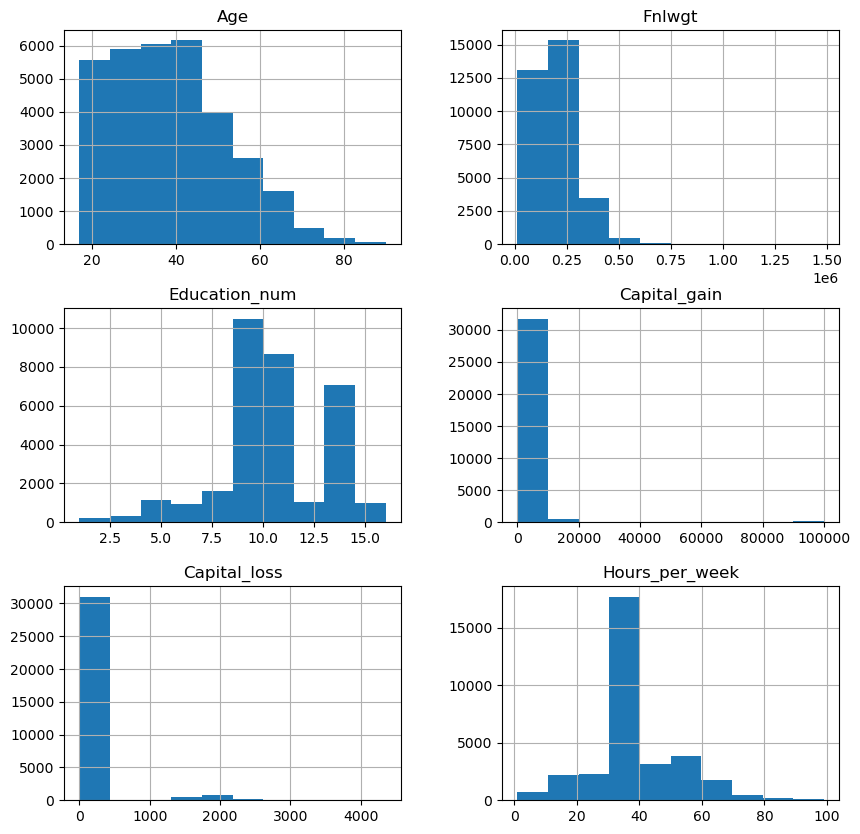

In [20]:
df_Census.hist(figsize=(10,10))
plt.show()

In [21]:
#standardize the numerical columns
from sklearn.preprocessing import StandardScaler
num_cols = df_Census.select_dtypes(include=['number'])
scaler = StandardScaler()
num_cols_scaled = scaler.fit_transform(num_cols)
num_cols

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [22]:
#standardize the numerical columns
from sklearn.preprocessing import StandardScaler
num_cols = df_Census.select_dtypes(include=['number'])
scaler = StandardScaler()
df_Census[num_cols.columns] = scaler.fit_transform(num_cols)
df_Census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,Self-emp-not-inc,-1.008703,Bachelors,1.134817,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145969,-0.216747,-2.222450,United-States,<=50K
1,-0.042934,Private,0.245008,HS-grad,-0.420646,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145969,-0.216747,-0.035664,United-States,<=50K
2,1.056935,Private,0.425720,11th,-1.198377,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145969,-0.216747,-0.035664,United-States,<=50K
3,-0.776180,Private,1.408036,Bachelors,1.134817,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145969,-0.216747,-0.035664,Cuba,<=50K
4,-0.116259,Private,0.898091,Masters,1.523683,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.145969,-0.216747,-0.035664,United-States,<=50K


In [23]:
#one hot encode the categorical features
df_Census = pd.get_dummies(df_Census, columns=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'])
df_Census.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.836961,-1.008703,1.134817,-0.145969,-0.216747,-2.222450,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042934,0.245008,-0.420646,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.056935,0.425720,-1.198377,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.776180,1.408036,1.134817,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.116259,0.898091,1.523683,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#encode the target feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_Census_enc = df_Census.copy()
df_Census_enc['Income'] = label_encoder.fit_transform(df_Census['Income'])
df_Census_enc.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.836961,-1.008703,1.134817,-0.145969,-0.216747,-2.222450,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042934,0.245008,-0.420646,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.056935,0.425720,-1.198377,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.776180,1.408036,1.134817,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.116259,0.898091,1.523683,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


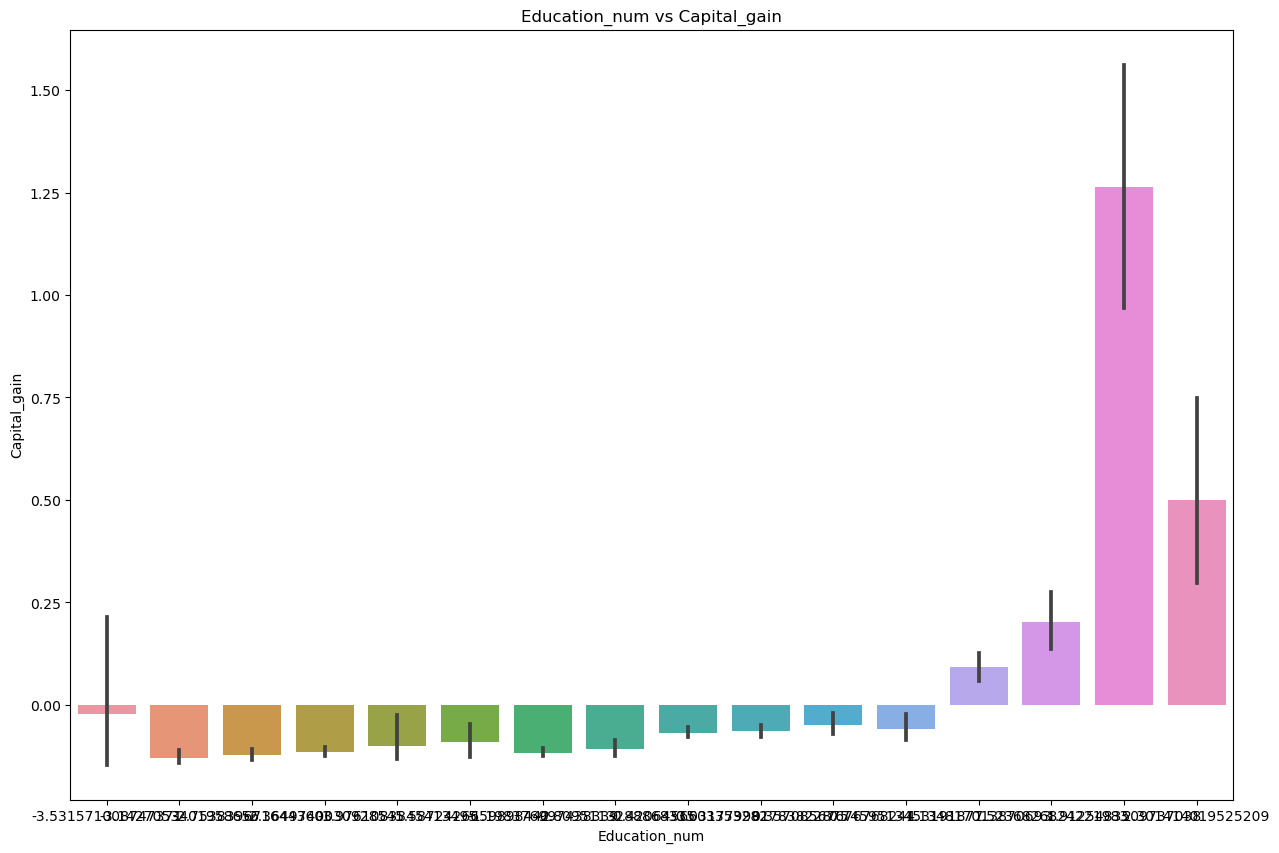

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='Education_num',y='Capital_gain',data=df_Census)
plt.title('Education_num vs Capital_gain')
plt.show()

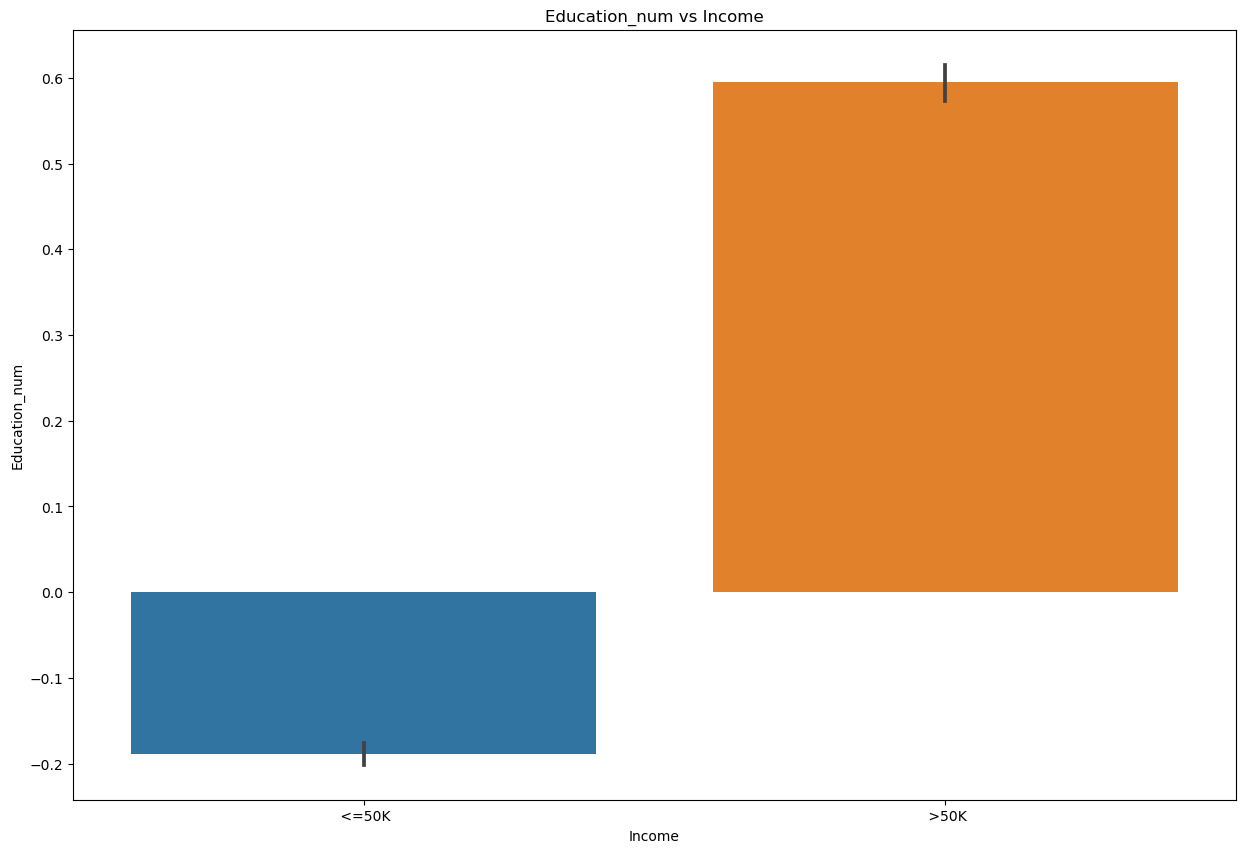

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(y='Education_num',x='Income',data=df_Census)
plt.title('Education_num vs Income')
plt.show()

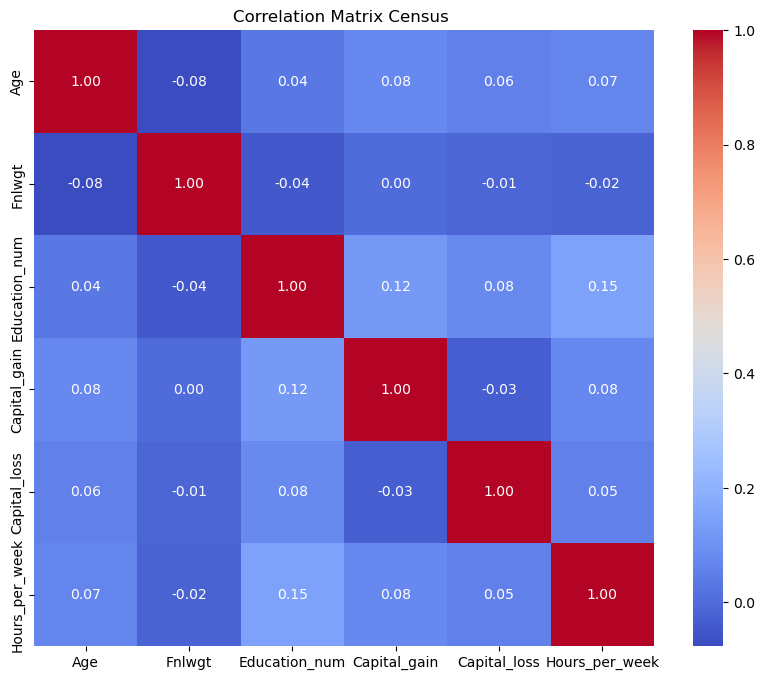

In [27]:
#Correlation Matrix

numerical_df_Census = df_Census .select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df_Census .corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Census ')
plt.show()

As per above correlation Graph
1.age :  week negative correlation with Fnlwgt,weak positive correlation with Education,capital_gain,capital_loss and hours_per_week


we can see most of them are week positive correlation and some are negitive correlation with each other  .



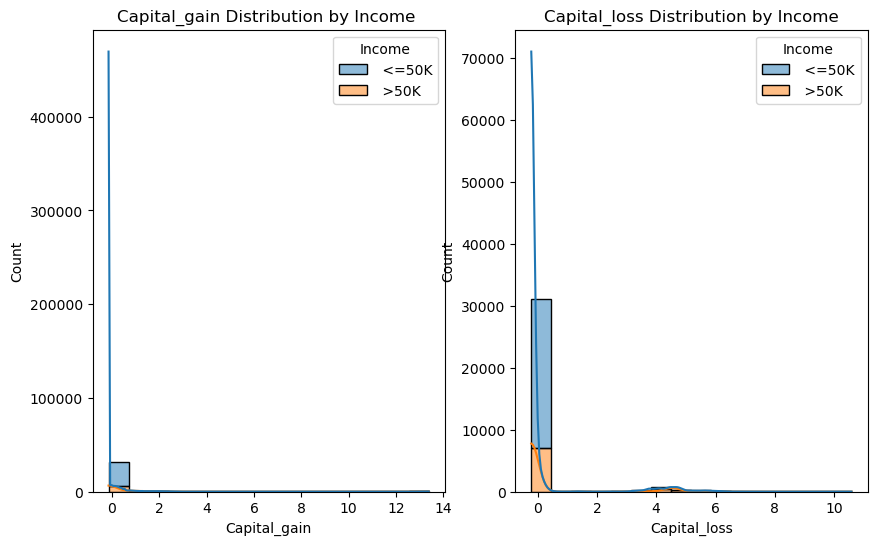

In [28]:
#analize

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(df_Census,x = 'Capital_gain',hue='Income',multiple='stack', kde =True)
plt.title('Capital_gain Distribution by Income ')

plt.subplot(1,2,2)
sns.histplot(data = df_Census,x='Capital_loss', hue='Income',multiple='stack', kde =True)
plt.title('Capital_loss Distribution by Income')
plt.show()

In [29]:
incom_analysis = df_Census.groupby('Income')[['Capital_gain','Capital_loss']].describe()
incom_analysis

Capital_gain                                                    \
              count      mean       std       min       25%       50%   
Income                                                                  
 <=50K      24697.0 -0.125827  0.130414 -0.145969 -0.145969 -0.145969   
 >50K        7839.0  0.396423  1.972413 -0.145969 -0.145969 -0.145969   

                            Capital_loss                                \
             75%        max        count      mean       std       min   
Income                                                                   
 <=50K -0.145969   5.445565      24697.0 -0.084789  0.771260 -0.216747   
 >50K  -0.145969  13.389441       7839.0  0.267130  1.477433 -0.216747   

                                                 
             25%       50%       75%        max  
Income                                           
 <=50K -0.216747 -0.216747 -0.216747  10.589464  
 >50K  -0.216747 -0.216747 -0.216747   8.919909

In [30]:
#split the dataset into x and y
y = df_Census_enc['Income']
df_Census_enc.drop('Income', axis=1, inplace=True)
X = df_Census_enc

**Explain a Logistic Regression Model using Coefficients**
we will focus on explaining a logistic regression model.

 A logistic regression model is intrinsically interpretable because you can immediately explain the model by looking at the coefficients.

 Larger coefficients indicate a stronger influence on the target value.

 Furthermore, we can get both positive and negative coefficients, which positively and negatively influence the probability of the target.

**We will do the following**

Instantiate the logistic regression class and fit it to the data.

To explain the model, you need to extract and plot the coefficients. For simplicity, only plot the top ten coefficients

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Lr_model = LogisticRegression()
Lr_model.fit(X,y)

LogisticRegression()

In [32]:
#Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
y_pred = Lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8551014136447449


In [34]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


print("Coefficients:\n",Lr_model.coef_)

Confusion Matrix:
[[4630  331]
 [ 612  935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4961
           1       0.74      0.60      0.66      1547

    accuracy                           0.86      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Coefficients:
 [[ 0.34702627  0.07331033  0.72718507  2.31234342  0.25880549  0.365977
  -0.20804475  0.56669492 -0.09943418 -0.10253049  0.07860767  0.25041308
  -0.40723847 -0.23120864 -0.89422255 -0.08312087 -0.27444279 -0.15448517
   0.42419958  0.47964599  0.00260035  0.00270055 -0.43009381 -0.13603803
  -0.12255204  0.08487269 -0.11215459 -0.04457102 -0.79966502  0.16473685
  -0.04859608 -0.68765587  1.54890955  1.32943689 -0.69497476 -1.17043484
  -0.80889314 -0.56335125 -0.31057523  0.0991655  -0.27153917  0.17794511
   0.88159358 -0.88903662 -0.56640741 -0.1869147  -0.72355909 -1.64675472


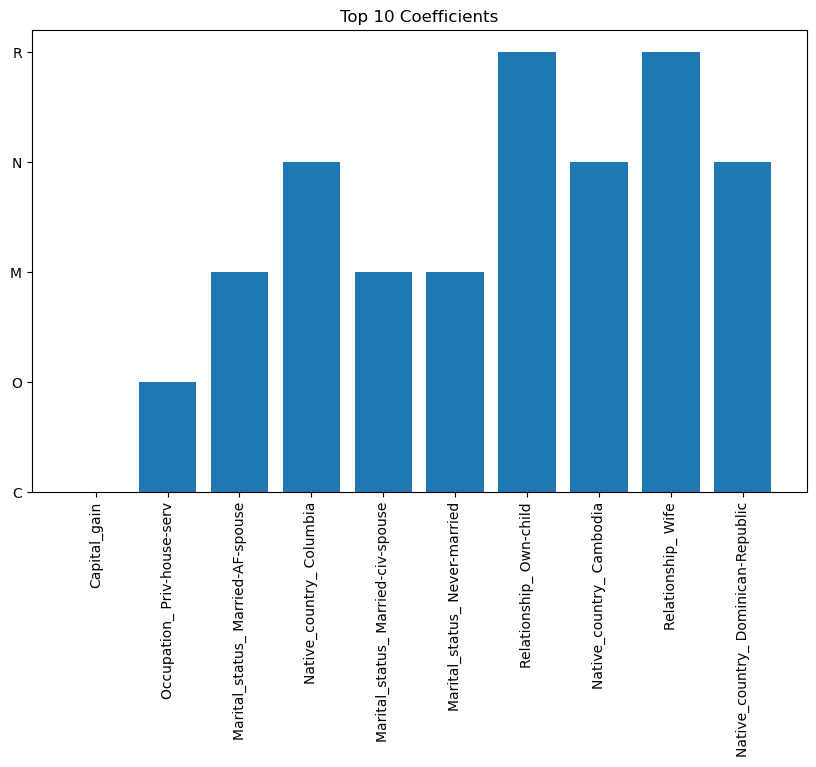

In [35]:
#plot the coefficients
coefficients = Lr_model.coef_[0]
#top_coefficients = coefficients.argsort()[-10:][::-1]

feature_names = list(X.columns)
coef_feature_pairs = list(zip(coefficients, feature_names))
top_coefficients = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), reverse=True)[:10]
top_coefficients = [x[1] for x in top_coefficients]
plt.figure(figsize=(10, 6))
plt.bar(top_coefficients, [x[0] for x in top_coefficients])
plt.xticks(rotation=90)
plt.title('Top 10 Coefficients')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.768837592562648

Accuracy: 0.8572526121696373


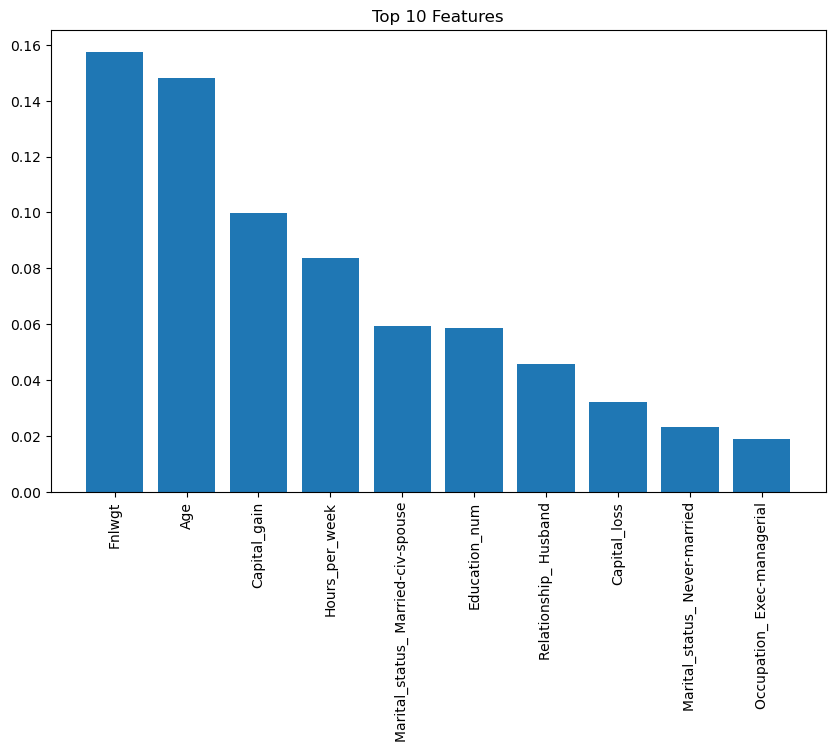

In [37]:
#random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier()
Rf_model.fit(X_train,y_train)
y_pred = Rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

importances = Rf_model.feature_importances_
feature_imp_df =  pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
top_n =10
top_features = feature_imp_df.head(top_n)
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Features')
plt.show()